In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pqm import pqm_pvalue
from scipy.stats import norm, chi2

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
plt.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rc("text", usetex=True)

Create a distribution, and sample from it twice

In [2]:
class TimeSeriesModel:
    def __init__(self, a = 0., sigma=1., nt=100):
        self.t = np.linspace(0, 10, nt)
        self.a = a
        self.sigma = sigma
        
    def generate_samples(self, num_samples):
        # Generate samples from each component
        y = self.a * np.cos(self.t) + self.sigma * np.random.randn(num_samples, len(self.t))
        return y


In [3]:
num_repeats = 20
gmm_null = TimeSeriesModel(a = 0)

amps = np.logspace(-2, 0, 20)
chisqs_mean = np.zeros_like(amps)
chisqs_std = np.zeros_like(amps)

for i, a in enumerate(amps):
    gmm = TimeSeriesModel(a = a)
    null_samples = gmm_null.generate_samples(num_samples=5000)
    y_samples = gmm.generate_samples(num_samples=5000)
    zs = []
    for _ in range(num_repeats):
        z = pqm_pvalue(y_samples, null_samples, return_stat = "chi2")
        zs.append(z)
        
    chisqs_mean[i] = np.mean(zs)
    chisqs_std[i] = np.std(zs)
    print(a, chisqs_mean[i], chisqs_std[i])

0.01 102.93413624666275 12.399686735318818
0.012742749857031334 94.8475157542288 14.888789517828693
0.016237767391887217 96.17122287563404 12.563787425734194
0.0206913808111479 100.75300695028669 10.9506678731715
0.026366508987303583 107.8169621468817 15.174527868140975
0.03359818286283781 101.92715500906371 18.028586030262492
0.04281332398719394 106.405903414409 18.05604337507725
0.0545559478116852 120.81982425466985 10.582103493460124
0.06951927961775606 139.20214382610504 16.92354399838479
0.08858667904100823 147.08897739028114 20.42094692499292
0.11288378916846889 184.0269560287537 24.50976216005174
0.14384498882876628 232.49132646441043 41.11591184405999
0.18329807108324356 289.25865800202786 42.02300158422346
0.23357214690901212 416.4955749920026 73.6868968749715
0.29763514416313175 635.8454440865522 91.22707407818973
0.37926901907322497 920.2561802433498 149.71718010701156
0.4832930238571752 1259.9474629508986 228.80208836598575
0.615848211066026 1860.5755301007648 289.993247217

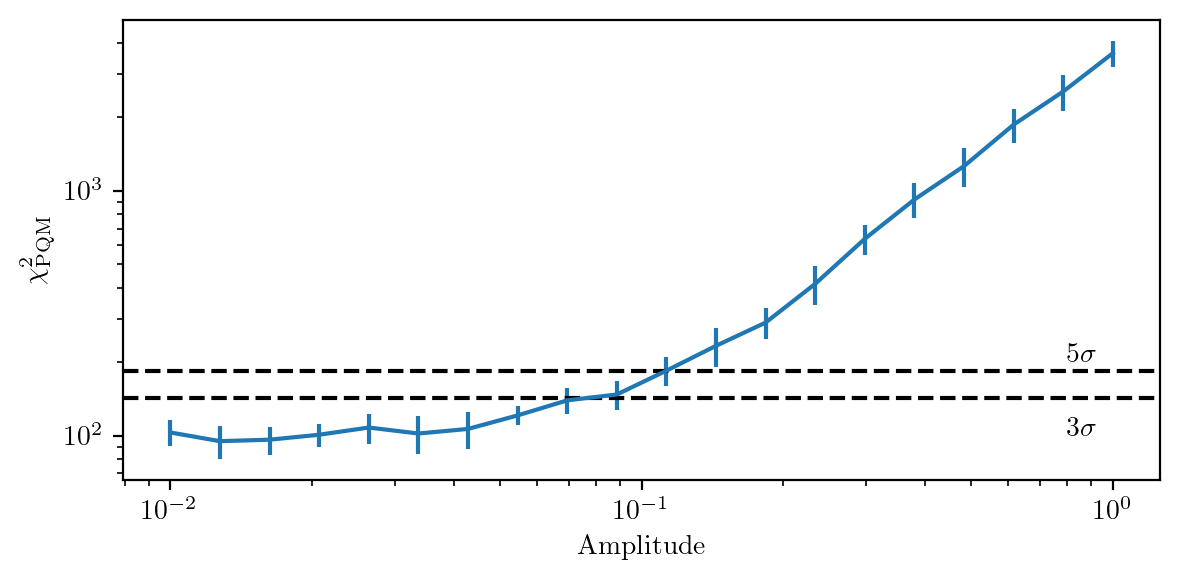

In [4]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.errorbar(amps, chisqs_mean, yerr=chisqs_std)
ax.axhline(chi2.ppf(0.997300203936740, 99), ls='--', color='k')
ax.axhline(chi2.ppf(0.999999426696856, 99), ls='--', color='k')
ax.text(0.8, 100, r'$3 \sigma$')
ax.text(0.8, 200, r'$5 \sigma$')
ax.set_xlabel('Amplitude')
ax.set_ylabel('$\chi^2_{\mathrm{ PQM}}$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.tight_layout()
plt.show()

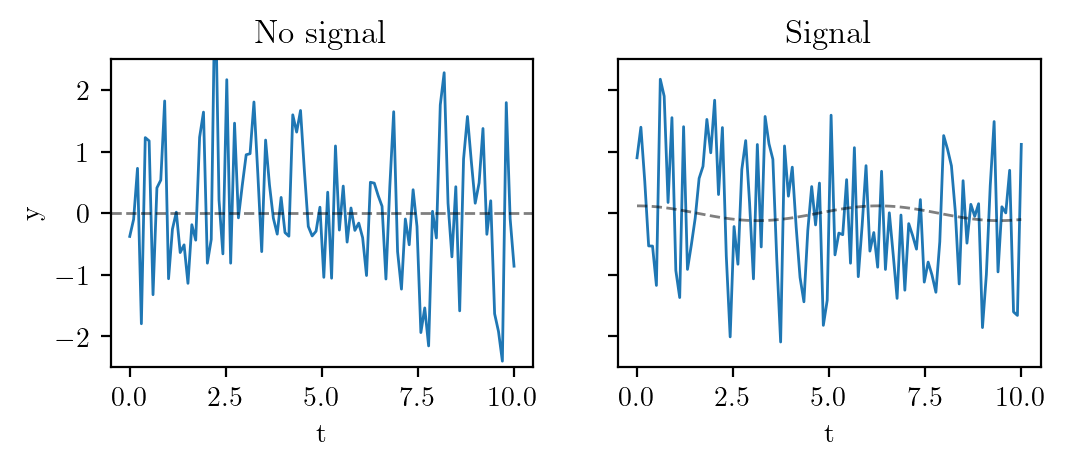

In [5]:
gmm = TimeSeriesModel(a = 0.12)
gmm_null = TimeSeriesModel(a = 0)
x_samples = gmm.generate_samples(num_samples=2)
null_samples = gmm_null.generate_samples(num_samples=2)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(6, 2), sharex=True, sharey=True)
axs[0].plot(gmm.t, null_samples[0], lw=1)
axs[0].axhline(0, color='k', lw=1, ls='--', alpha=0.5)
axs[0].set_ylim([-2.5, 2.5])
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].set_title('No signal')

axs[1].plot(gmm.t, x_samples[0], lw=1)
axs[1].plot(gmm.t, gmm.a * np.cos(gmm.t), color='k', lw=1, ls='--', alpha=0.5)
axs[1].set_ylim([-2.5, 2.5])
axs[1].set_title('Signal')
axs[1].set_xlabel('t')

plt.show()